<a href="https://colab.research.google.com/github/muskaanramchandani/tema1-trabalho-redes-neurais/blob/main/Tema1_Trabalho2_RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python: 3.12.12
Pandas: 2.2.2
Numpy: 2.0.2
Seaborn: 0.13.2
Keras: 3.10.0

--- 1. Upload e Limpeza ---
Shape Inicial: (1025, 14)
Shape após limpeza: (1025, 14)
Tipos de Dados convertidos para numérico.

--- 2. Análise Exploratória e Visualização ---
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000 

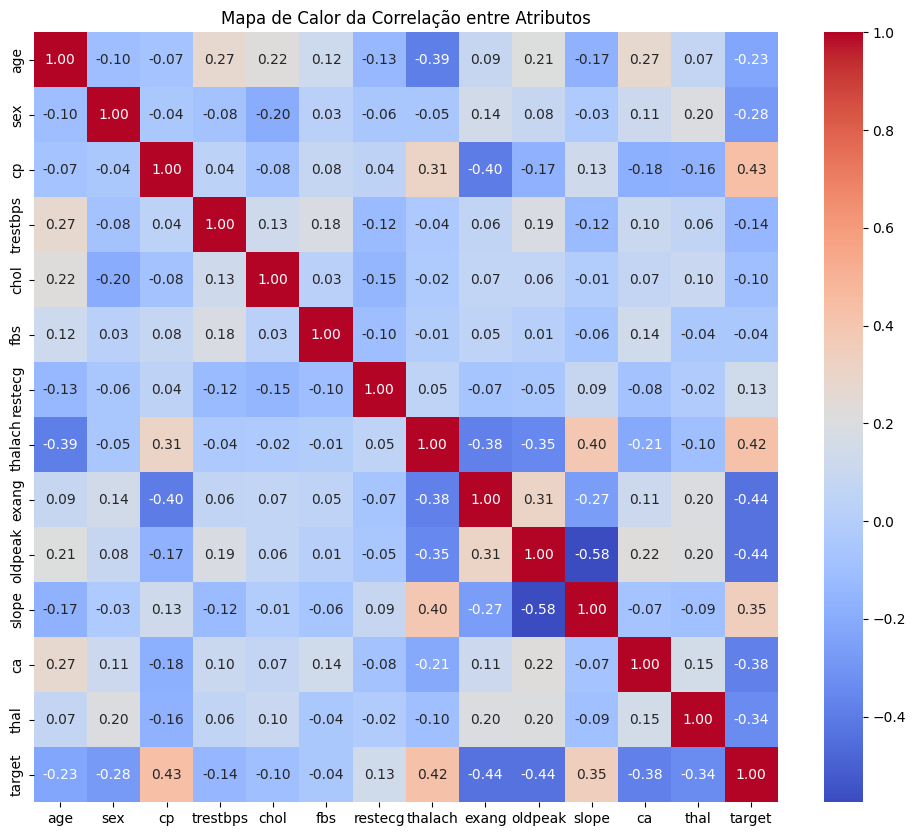


Dados Treino: (820, 13), Dados Teste: (205, 13)
Dados Padronizados (StandardScaler).

--- 4. Sumário do Modelo Binário ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

Treinamento concluído.


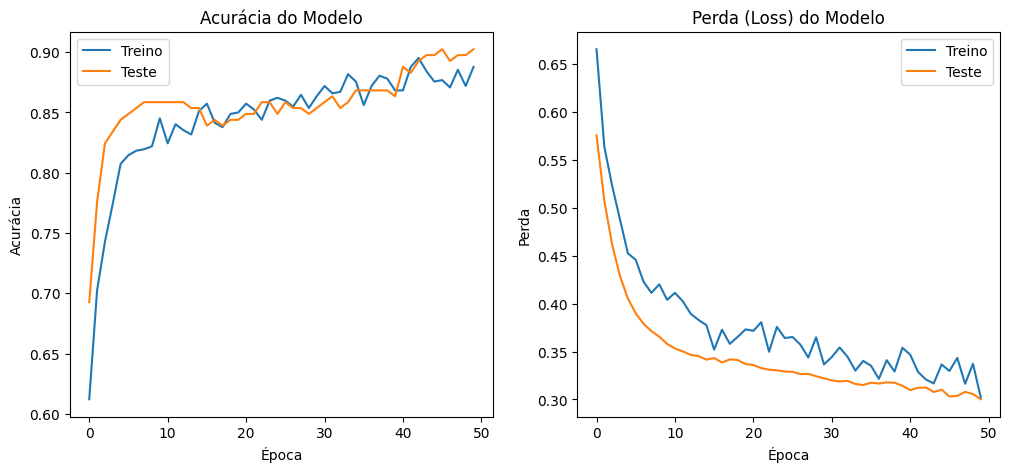

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

--- 5. Resultados Finais e Métricas (Conjunto de Teste) ---
Acurácia: 0.9024

Relatório de Classificação (Precisão, Recall, F1-Score):

                precision    recall  f1-score   support

0 (Sem Doença)       0.92      0.88      0.90       100
1 (Com Doença)       0.89      0.92      0.91       105

      accuracy                           0.90       205
     macro avg       0.90      0.90      0.90       205
  weighted avg       0.90      0.90      0.90       205



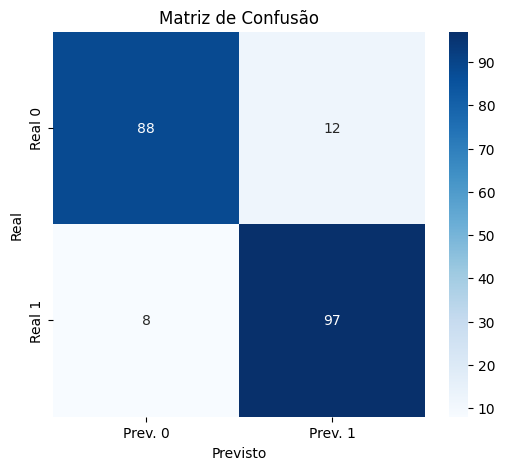

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow import keras # Import Keras from TensorFlow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

print(f'Python: {sys.version.split()[0]}')
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Keras: {keras.__version__}') # Print Keras version using the imported name

# PARTE 1. UPLOAD E LIMPEZA DOS DADOS
print("\n--- 1. Upload e Limpeza ---")
# OBS: Arquivo renomeado para 'heart.csv' para melhor compatibilidade com pd.read_csv
try:
    df = pd.read_csv('../content/heart.csv')
except FileNotFoundError:
    print("ERRO: Certifique-se de que o arquivo 'heart.csv' está no diretório correto.")
    sys.exit()

print(f"Shape Inicial: {df.shape}")

# Remoção de marcadores de ausência ('?') e linhas com NaN
df = df[~df.isin(['?'])]
df = df.dropna(axis=0)
print(f"Shape após limpeza: {df.shape}")

# Garantir que todas as colunas sejam do tipo numérico
df = df.apply(pd.to_numeric)
print("Tipos de Dados convertidos para numérico.")

# PARTE 2. INSPEÇÃO E VISUALIZAÇÃO
print("\n--- 2. Análise Exploratória e Visualização ---")
print(df.describe())

# Mapa de Calor para a correlação dos atributos
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de Calor da Correlação entre Atributos')
plt.show()

# PARTE 3. PREPARAÇÃO PARA O MODELO BINÁRIO

# DEFINIÇÃO: Variável Alvo (y): 0 (Ausência) ou 1 (Presença) de doença cardíaca
# NOTA: O dataset Heart Disease UCI geralmente já utiliza 0/1 para este alvo.
# VERIFICAÇÃO: A conversão a seguir assegura o formato binário para o modelo.
y = df['target'].copy()
X = df.drop('target', axis=1).copy()

# Assegura que 'target' seja estritamente binário (0 ou 1)
y[y > 0] = 1

# Separação dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nDados Treino: {X_train.shape}, Dados Teste: {X_test.shape}")

# Aplicação do Standard Scaler às características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Dados Padronizados (StandardScaler).")


# PARTE 4. DEFINIÇÃO E EXECUÇÃO DO TREINAMENTO

def create_binary_model(input_dim):
    # ESTRUTURA: Modelo ANN feedforward com camadas densas
    model = Sequential()

    # CAMADA 1: 16 neurônios, ReLU e L2
    model.add(Dense(16, input_dim=input_dim, activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25)) # Regularização (Dropout) [cite: 27]

    # CAMADA 2: 8 neurônios, ReLU e L2
    model.add(Dense(8, activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.25))

    # CAMADA FINAL: 1 neurônio, Sigmoide para o resultado binário
    model.add(Dense(1, activation='sigmoid'))

    # CONFIGURAÇÃO: Compilação do modelo com perda e otimizador
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

# INSTANCIAÇÃO: Criação da arquitetura da rede neural
binary_model = create_binary_model(X_train_scaled.shape[1])
print("\n--- 4. Sumário do Modelo Binário ---")
binary_model.summary()

# TREINAMENTO: Ajuste dos pesos da rede
history = binary_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=10,
    verbose=0 # AJUSTE: Mude para 1 para visualizar o progresso
)
print("Treinamento concluído.")

# PARTE 5. MEDIÇÃO DE DESEMPENHO

# 5.1 VISUALIZAÇÃO: Gráficos da Acurácia e Perda ao longo das épocas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Teste')
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Teste')
plt.title('Perda (Loss) do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()
plt.show()

# 5.2 PREVISÃO: Geração das probabilidades e classes binárias
y_pred_prob = binary_model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred_prob).astype(int)

# 5.3 RESULTADOS: Impressão da acurácia e relatório de classificação
print("\n--- 5. Resultados Finais e Métricas (Conjunto de Teste) ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_binary):.4f}")
print("\nRelatório de Classificação (Precisão, Recall, F1-Score):\n")
print(classification_report(y_test, y_pred_binary, target_names=['0 (Sem Doença)', '1 (Com Doença)']))

# 5.4 AVALIAÇÃO: Visualização da Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prev. 0', 'Prev. 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()